In [124]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

### Full Catalog (tract = 3830)

### Catalog used in AMICO

In [125]:
gal = Table.read("/sps/lsst/users/namourou/web/desc/clusters/DC2_mask/galaxies.fits")

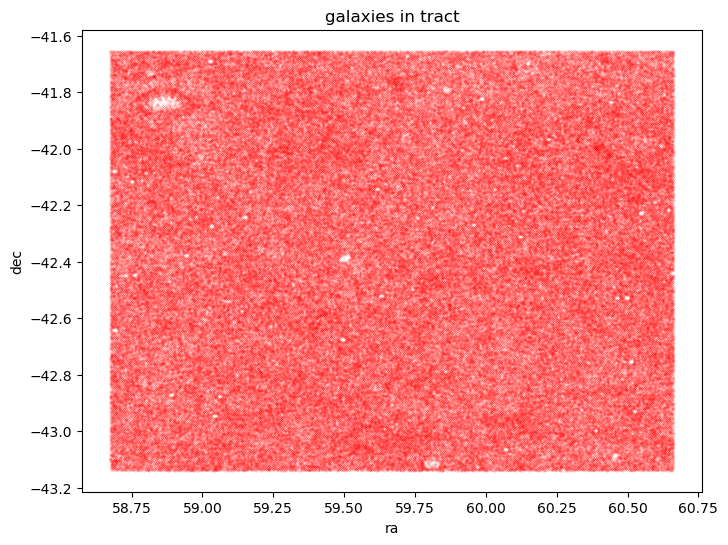

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(gal['ra'],gal['dec'], s=0.01, alpha = .5, color = 'red')
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
plt.savefig('copy_hehe.png', bbox_inches='tight')
#plt.legend()

# Density map

In [127]:
ra_min, ra_max = min(gal['ra']), max(gal['ra'])
dec_min, dec_max = min(gal['dec']), max(gal['dec'])
#ra_min, ra_max = 60,60.5
#dec_min, dec_max = -36.4, -36

# Définir la taille des carrés (en degrés)
cote_carré = 0.01  # Vous pouvez ajuster cette valeur

# Créer une grille de carrés
ra_bins = np.arange(ra_min, ra_max, cote_carré)
dec_bins = np.arange(dec_min, dec_max, cote_carré)

# Créer des tableaux pour stocker les densités de galaxies
densités = np.zeros((len(ra_bins) - 1, len(dec_bins) - 1), dtype=float)

In [128]:
len(ra_bins), len(dec_bins)

(199, 149)

In [129]:
# Parcourir chaque carré et calculer la densité de galaxies
for i in range(len(ra_bins) - 1):
    for j in range(len(dec_bins) - 1):
        ra_min, ra_max = ra_bins[i], ra_bins[i + 1]
        dec_min, dec_max = dec_bins[j], dec_bins[j + 1]

        # Sélectionner les galaxies dans le carré
        in_square = gal[(gal['ra'] >= ra_min) & (gal['ra'] < ra_max) & (gal['dec'] >= dec_min) & (gal['dec'] < dec_max)]

        # Calculer la densité de galaxies dans le carré
        densité = len(in_square) / (cote_carré * cote_carré)

        densités[i, j] = densité   
    if i%10==0:
        print(i)

KeyboardInterrupt: 

In [130]:
dens = np.histogram2d(gal['ra'], gal['dec'], bins = (ra_bins,dec_bins))[0]

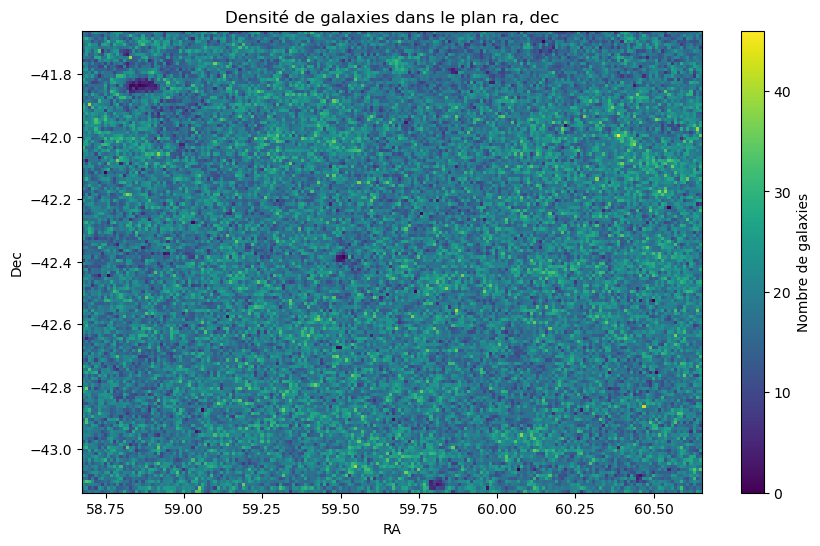

In [131]:
ra_grid, dec_grid = np.meshgrid(ra_bins, dec_bins)

# Créez une figure de densité
plt.figure(figsize=(10, 6))
plt.pcolormesh(ra_grid, dec_grid, dens.T, cmap='viridis')
plt.colorbar(label='Nombre de galaxies')
plt.title('Densité de galaxies dans le plan ra, dec')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [132]:
mu = np.mean(dens)
sigma = np.std(dens)
print(mu,sigma)

18.922058422058424 4.983668322977846


In [133]:
d_flat=dens.ravel()

(array([3.000e+01, 2.900e+01, 7.100e+01, 5.060e+02, 1.092e+03, 2.091e+03,
        5.618e+03, 4.769e+03, 4.591e+03, 3.738e+03, 3.971e+03, 1.366e+03,
        7.660e+02, 4.890e+02, 1.230e+02, 3.700e+01, 1.300e+01, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ,
        25.3, 27.6, 29.9, 32.2, 34.5, 36.8, 39.1, 41.4, 43.7, 46. ]),
 <BarContainer object of 20 artists>)

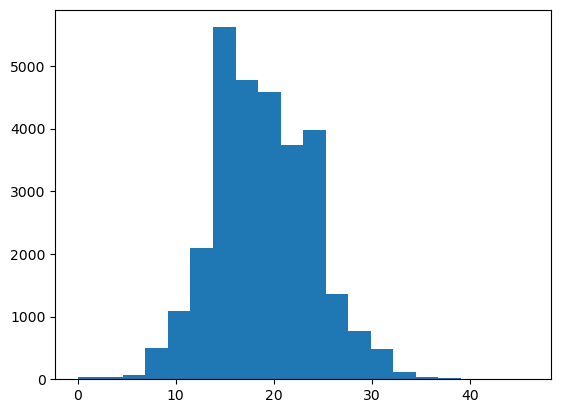

In [134]:
plt.hist(d_flat, bins = 20)

In [135]:
mu-3*sigma

3.9710534531248847

In [136]:
ra_pt = []
for i in range(len(ra_bins)-1):
    ra_pt.append((ra_bins[i]+ra_bins[i+1])/2) 

In [137]:
dec_pt = []
for i in range(len(dec_bins)-1):
    dec_pt.append((dec_bins[i]+dec_bins[i+1])/2) 

In [138]:
ra_pt_grid, dec_pt_grid = np.meshgrid(ra_pt, dec_pt)

In [152]:
indices_inférieurs_à_la_moyenne = np.where(dens.T < mu-3*sigma)

# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask = ra_pt_grid[indices_inférieurs_à_la_moyenne]
dec_mask = dec_pt_grid[indices_inférieurs_à_la_moyenne]

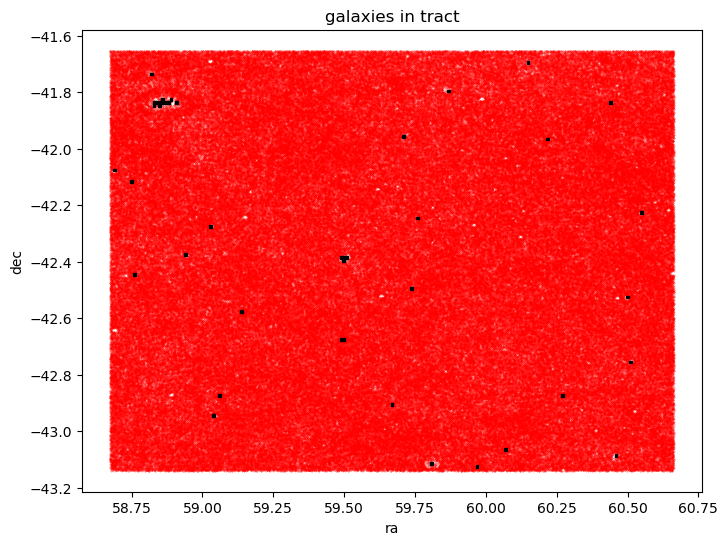

In [153]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(gal['ra'],gal['dec'], s=0.1, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = 1)
    ax.add_patch(rectangle)
plt.savefig('copy_hehe.png', bbox_inches='tight')

#plt.legend()

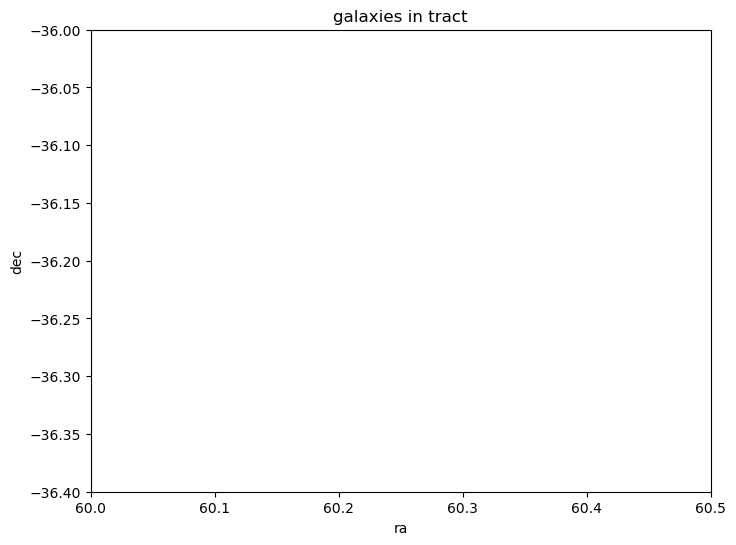

In [141]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(gal['ra'],gal['dec'], s=0.1, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = 1)
    ax.add_patch(rectangle)
plt.xlim([60,60.5])
plt.ylim([-36.4,-36.0])
plt.savefig('copy_hehe.png', bbox_inches='tight')